In [70]:
#%pip install quandl

In [71]:
%matplotlib inline
import quandl
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#### create an account with quandl to acess its data through API integration
#### use this link to signup : https://www.quandl.com/sign-up-modal?defaultModal=showSignUp
#### after creation of account you would get the API - KEY
#### Insert it  below below

In [72]:
quandl.ApiConfig.api_key = 'WsrgQrsfd89oo153AZPY'

In [93]:
stock_list = ['AAPL','AMZN', 'MSFT', 'GOOG']
start = datetime(2017, 12, 31)
end = datetime.now()

In [94]:
file = quandl.get_table('WIKI/PRICES', ticker = stock_list, 
                        #qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, ## select the columns you might want or select all 
                        date = { 'gte': start, 'lte': end }, 
                        paginate=True).set_index("date")

In [95]:
file.head()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2018-03-27,MSFT,94.940,95.139,88.51,89.47,53704562.0,0.0,1.0,94.940,95.139,88.51,89.47,53704562.0
2018-03-26,MSFT,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610,94.000,90.40,93.78,55031149.0
2018-03-23,MSFT,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500,90.460,87.08,87.18,42159397.0
2018-03-22,MSFT,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265,91.750,89.66,89.79,37578166.0
2018-03-21,MSFT,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930,94.050,92.21,92.48,23753263.0


In [96]:
file.tail()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2018-01-08,AAPL,174.35,175.61,173.93,174.35,20134092.0,0.0,1.0,174.35,175.61,173.93,174.35,20134092.0
2018-01-05,AAPL,173.44,175.37,173.05,175.00,23016177.0,0.0,1.0,173.44,175.37,173.05,175.00,23016177.0
2018-01-04,AAPL,172.54,173.47,172.08,173.03,22211345.0,0.0,1.0,172.54,173.47,172.08,173.03,22211345.0
2018-01-03,AAPL,172.53,174.55,171.96,172.23,28819653.0,0.0,1.0,172.53,174.55,171.96,172.23,28819653.0
2018-01-02,AAPL,170.16,172.30,169.26,172.26,25048048.0,0.0,1.0,170.16,172.30,169.26,172.26,25048048.0


In [97]:
AAPL = file[file.ticker=="AAPL"]
AMZN = file[file.ticker=="AMZN"]
MSFT = file[file.ticker=="MSFT"]
GOOG = file[file.ticker=="GOOG"]

In [98]:
df_APPL = AAPL["adj_close"]

In [99]:
df_APPL.head()

date
2018-03-27    168.340
2018-03-26    172.770
2018-03-23    164.940
2018-03-22    168.845
2018-03-21    171.270
Name: adj_close, dtype: float64

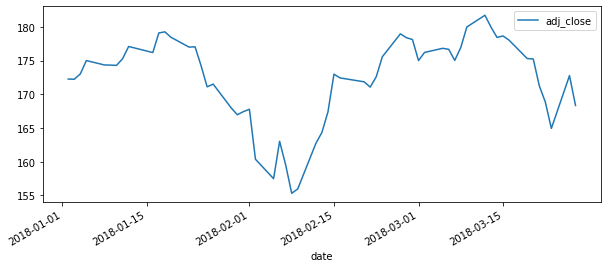

In [100]:
df_APPL.plot(legend=True, figsize=(10,4))

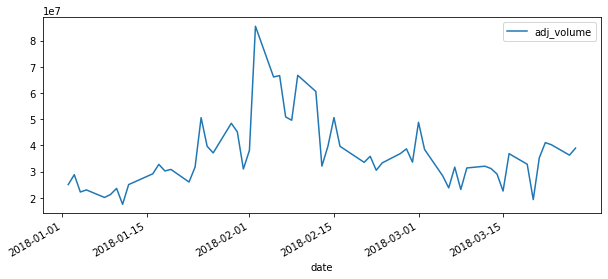

In [101]:
AAPL['adj_volume'].plot(legend=True,figsize=(10,4))

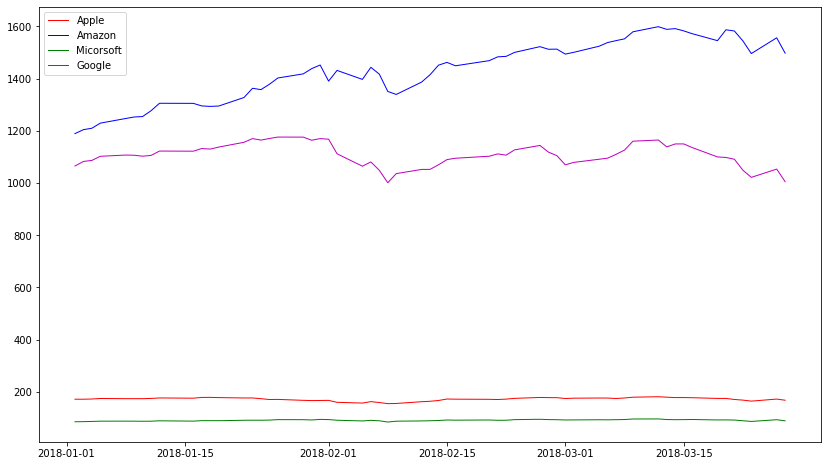

In [102]:
#plot all
plt.figure(figsize=(14,8))
plt.plot(AAPL['adj_close'],'r',label="Apple",linewidth=1)
plt.plot(AMZN['adj_close'],'b',label="Amazon",linewidth=1)
plt.plot(MSFT['adj_close'],'g',label="Micorsoft",linewidth=1)
plt.plot(GOOG['adj_close'],'m',label="Google",linewidth=1)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


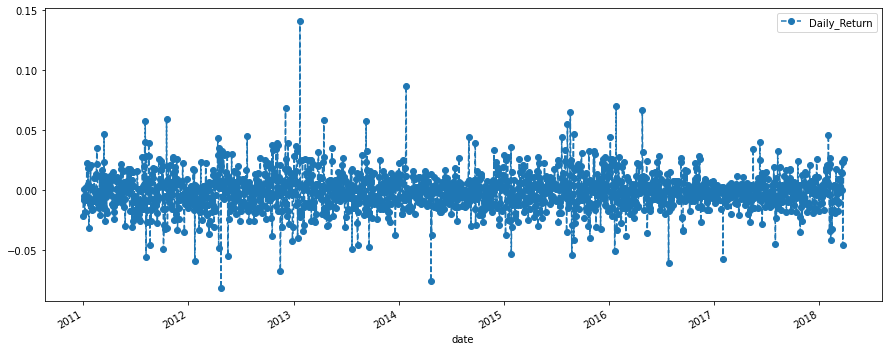

In [92]:
AAPL['Daily_Return'] = AAPL['adj_close'].pct_change()
AAPL['Daily_Return'].plot(figsize=(15,6),legend=True,linestyle='--',marker='o');

In [83]:
closing_price_stock = quandl.get_table('WIKI/PRICES', ticker = stock_list, 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, ## select the columns you might want or select all 
                        date = { 'gte': start, 'lte': end }, 
                        paginate=True).pivot(index="date",columns='ticker', values='adj_close')

In [84]:
closing_price_stock.head()

ticker,AAPL,AMZN,GOOG,MSFT
date,,,,
2010-12-31,41.453456,180.00,NaN,23.153497
2011-01-03,42.354338,184.22,NaN,23.211568
2011-01-04,42.575382,185.01,NaN,23.300747
2011-01-05,42.923655,187.42,NaN,23.228159
2011-01-06,42.888956,185.86,NaN,23.908412


In [85]:
stock_returns = closing_price_stock.pct_change()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


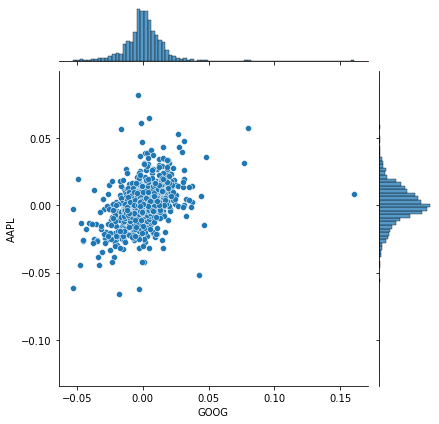

In [86]:
sns.jointplot('GOOG','AAPL',stock_returns,kind='scatter')

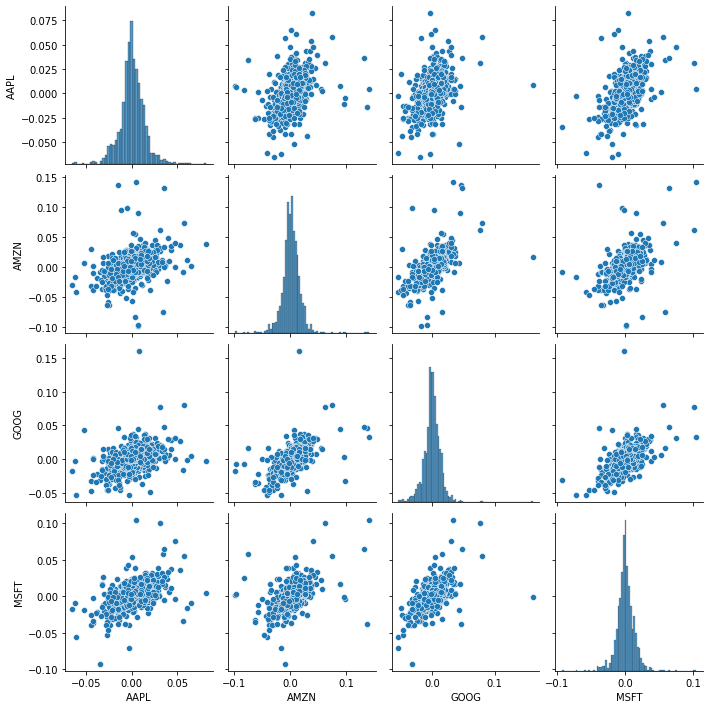

In [87]:
sns.pairplot(stock_returns.dropna())

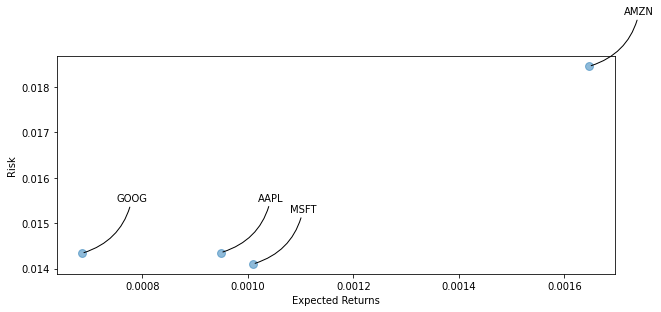

In [88]:
returns = stock_returns.dropna()
area = np.pi*20
plt.figure(figsize=(10,4))
plt.scatter(returns.mean(),returns.std(),alpha=0.5,s=area)
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha='center', va='bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))